In [6]:
import pandas as pd
CS = pd.read_csv('../data/01.CCTV_in_Seoul.csv',encoding='utf-8')
CS.rename(columns={CS.columns[0]: '구별'},inplace=True)
#cname=CS['구별'].tolist()
#total=CS['소계'].tolist()
#y2013ago=CS['2013년도 이전'].tolist()
#y2014=CS['2014년'].tolist()
#y2015=CS['2015년'].tolist()
#y2016=CS['2016년'].tolist()
#print(cname)

PS = pd.read_excel('../data/01.population_in_Seoul.xls',header=2,usecols='B,D,G,J,N',encoding='utf-8')
PS.rename(columns={PS.columns[0]:'구별',PS.columns[1]:'인구수',PS.columns[2]:'한국인',PS.columns[3]:'외국인',PS.columns[4]:'고령자'},inplace=True)

CS.sort_values(by='소계',ascending=True).head(24)
CS['최근증가율']=(CS['2016년']+CS['2015년']+CS['2014년'])/CS['2013년도 이전']*100 #2013년도 이전과 2014년,2015년,2016년을 비교했을때, CCTV설치증가율
CS.sort_values(by='최근증가율',ascending=False).head(10)

PS.drop([0],inplace=True) #행삭제

PS['구별'].unique()

PS[PS['구별'].isnull()] #null값 데이터 확인

PS['외국인비율'] = PS['외국인']/PS['인구수']*100
PS['고령자비율'] = PS['고령자']/PS['인구수']*100   #구별 인구수 대비 고령자, 외국인 비율 컬럼생성

#PS.sort_values(by='인구수',ascending=False).head()   #인구수 기준의 내림차순 정렬 
PS.sort_values(by='외국인',ascending=False).head()   #외국인 기준의 내림차순 정렬

data_result=pd.merge(CS,PS,on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1010,379,99,155,377,166.490765,437050,432749,4301,57680,0.984098,13.197575
2,강북구,831,369,120,138,204,125.203252,326063,322385,3678,57401,1.128003,17.604267
3,강서구,911,388,258,184,81,134.793814,606981,600257,6724,78042,1.107778,12.857404
4,관악구,2109,846,260,390,613,149.290780,521960,504048,17912,71317,3.431681,13.663308


In [3]:
import pandas as pd
left = pd.DataFrame({'key':['K0','K4','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['C0','C1','C2','C3'],
                    'B':['D0','D1','D2','D3']})

#pd.merge(left,right,on='key')
#pd.merge(left,right,on='key',how='left')
pd.merge(left,right,on='key',how='right')

,A_x,B_x,key,A_y,B_y
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3
3,NaN,NaN,K1,C1,D1


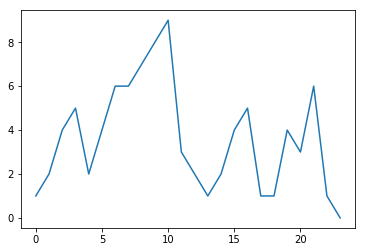

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot([1,2,4,5,2,4,6,6,7,8,9,3,2,1,2,4,5,1,1,4,3,6,1,0])
plt.show()

In [17]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system() =='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else :
    print('Unknown File.')
    
plt.figure()
plt.show()

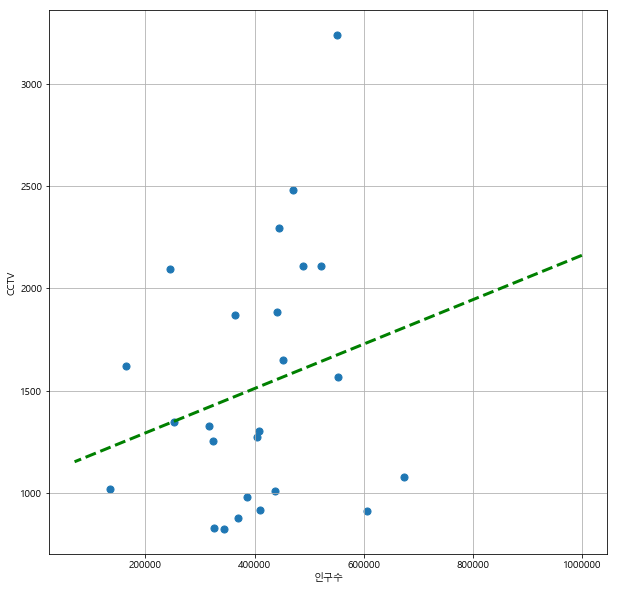

In [27]:
import pandas as pd
import numpy as np

CS = pd.read_csv('../data/01.CCTV_in_Seoul.csv',encoding='utf-8')
CS.rename(columns={CS.columns[0]: '구별'},inplace=True)

PS = pd.read_excel('../data/01.population_in_Seoul.xls',header=2,usecols='B,D,G,J,N',encoding='utf-8')
PS.rename(columns={PS.columns[0]:'구별',PS.columns[1]:'인구수',PS.columns[2]:'한국인',PS.columns[3]:'외국인',PS.columns[4]:'고령자'},inplace=True)

data_result=pd.merge(CS,PS,on='구별')
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(1000000,70000,100)

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()